# CSM148 Project 3

## 1. Loading Data and Analysis

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns

In [69]:
raw_data = pd.read_csv('./data/healthcare-dataset-stroke-data.csv')

#identify 'Unknown' smoking and 'Other' gender values as Null values
raw_data['gender'] = raw_data['gender'].replace({'Other': None})
raw_data['smoking_status'] = raw_data['smoking_status'].replace({'Unknown':None})

raw_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [70]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     3566 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [71]:
#since ever_married is a binary yes/no column with no missing values, we can easily convert this to numerical values
raw_data['ever_married'] = raw_data['ever_married'].replace({"Yes":1, "No":0})

#and since gender has only 1 value of the kind "Other", we can drop that row and convert it to a binary value as well.
raw_data = raw_data[raw_data['gender'].notna()]
raw_data['gender'] = raw_data['gender'].replace({'Male':1, 'Female':0})

#Since Residence_type is also a variable with two values we can convert this to binary as well
raw_data['Residence_type'] = raw_data['Residence_type'].replace({'Urban':1, 'Rural':0})

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   int64  
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   int64  
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   int64  
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     3565 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 518.9+ KB


In [72]:
raw_data.describe()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,36513.985516,0.413975,43.229986,0.097475,0.054022,0.656293,0.508123,106.140399,28.89456,0.048738
std,21162.008804,0.492592,22.613575,0.296633,0.226084,0.474991,0.499983,45.285004,7.85432,0.215340
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,17740.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,36922.000000,0.000000,45.000000,0.000000,0.000000,1.000000,1.000000,91.880000,28.10000,0.000000
75%,54643.000000,1.000000,61.000000,0.000000,0.000000,1.000000,1.000000,114.090000,33.10000,0.000000
max,72940.000000,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,97.60000,1.000000


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'hypertension'}>,
        <AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'ever_married'}>],
       [<AxesSubplot:title={'center':'Residence_type'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'stroke'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

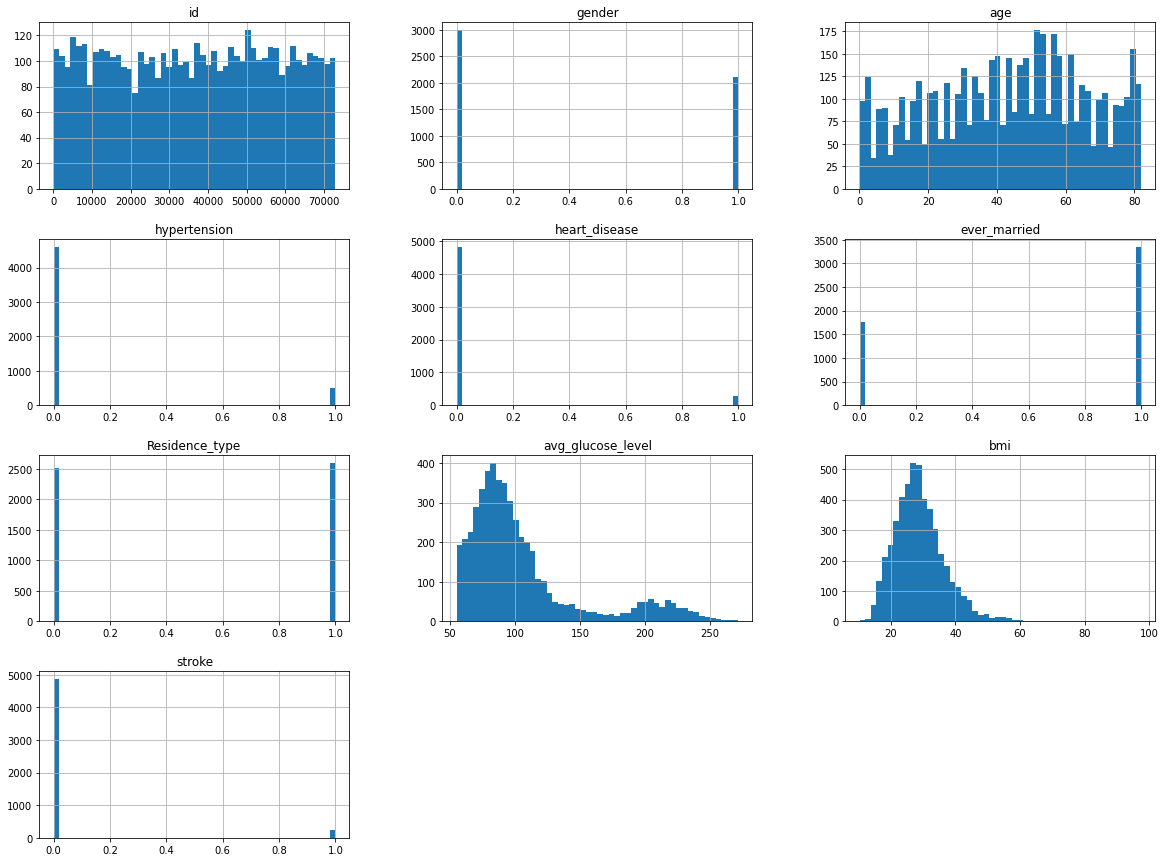

In [73]:
raw_data.hist(bins=50,figsize=(20,15))

Its interesting to note here that the dataset is imbalanced, with a huge majority of datapoints labeled negative for a stroke rather than positive. 

<AxesSubplot:>

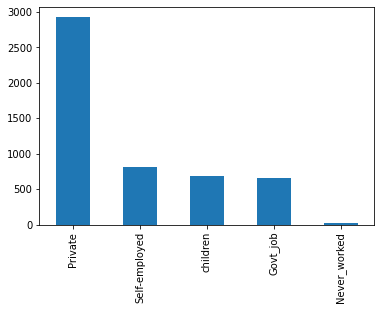

In [74]:
raw_data['work_type'].value_counts().plot.bar()

<AxesSubplot:>

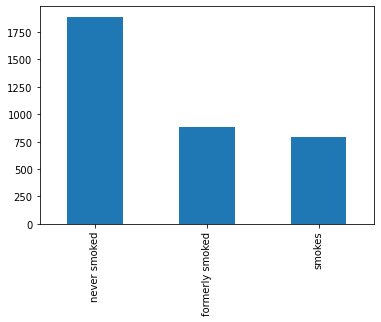

In [75]:
raw_data['smoking_status'].value_counts().plot.bar()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   int64  
 6   Residence_type     5109 non-null   int64  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     3565 non-null   float64
 10  stroke             5109 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 479.0 KB


<AxesSubplot:>

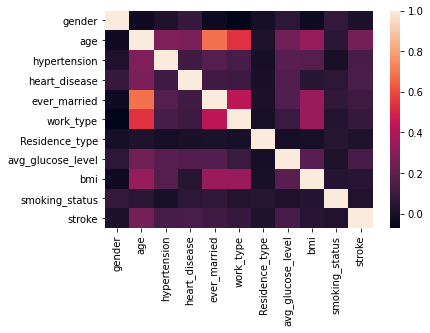

In [76]:
#in order to consider categorical variables for the correlation matrix we can temporarily bin them into numerical categories
corr_data = raw_data.drop(columns=['id'])
corr_data['work_type'] = corr_data['work_type'].replace({'children':0,'Govt_job':1,'Never_worked':2,'Private':3,'Self-employed':4})
corr_data['smoking_status'] = corr_data['smoking_status'].replace({'never smoked':0, 'formerly smoked':1, 'smokes': 2})

corr_data.info()
corr_mat = corr_data.corr()
sns.heatmap(corr_mat)

It's interesting to see here that a majority of our values are not heavily correlated with each other. The lack of correlation of a single factor to stroke may also be because of the dataset imbalance. Age and ever_married are understandingly correlated to an extent, as well as age and work_type. However, the second is less reliable because it is not appropriately encoded yet. 

## 2. Data Augmentation, Processing and Pipelining

#### Data Imputation

In [77]:
#since id is just a random identifier, it is irrelevant to our dataset
processed_data = raw_data.drop(columns=['id'])

#since smoking_status has a number of null-values, we are forced to drop rows with those values, since there is no logical way to impute a value for these data points without introducing bias
processed_data = processed_data[processed_data['smoking_status'].notna()]

#since undersampling bmi does not reduce the size of the dataset further by much, it may be the best idea to impute this feature by dropping rows in order to not introduce bias.
processed_data = processed_data[processed_data['bmi'].notna()]

#### Data Augmentation

Since bad health at a high age is a particular risk for health disorders, it may be relevant to perform a feature cross between indicators of bad health and age.

In [79]:
#Data Augmentation 1

#Feature Cross Age and BMI:
processed_data['bmi_age'] = processed_data['bmi']*processed_data['age']

In [80]:
#Data Augmentation 2

#Feature Cross Age and Average Glucose Level:
processed_data['glucose_age'] = processed_data['avg_glucose_level']*processed_data['age']

#### Data Pipeline

In [81]:
#seperate target variable from data before pipelining
labels = processed_data['stroke']
processed_data.drop(columns=['stroke'], inplace=True)
processed_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,bmi_age,glucose_age
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,2452.2,15322.23
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,2600.0,8473.60
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1685.6,8390.27
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1896.0,13755.48
5,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,2349.0,15083.01


In [82]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

numerical_features = ['age','avg_glucose_level','bmi','bmi_age','glucose_age']
categorical_features = processed_data.select_dtypes(include=['object']).columns

scaler = StandardScaler()
X = processed_data

#chose this method of pipelining, to keep column names after transforms
for c in categorical_features:
    X = pd.concat([X,pd.get_dummies(X[c], prefix=c)],axis=1)
    X.drop(columns=[c], inplace=True)

X[numerical_features] = scaler.fit_transform(X[numerical_features])

y = labels
column_labels = X.columns

X.head()


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,bmi_age,glucose_age,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0.973480,0,1,1,1,2.523666,0.864688,1.455755,2.575993,0,0,1,0,0,1,0,0
2,1,1.663236,0,1,1,0,-0.050140,0.302637,1.678144,0.783513,0,0,1,0,0,0,1,0
3,0,0.018435,0,0,1,1,1.319048,0.563100,0.302279,0.761704,0,0,1,0,0,0,0,1
4,0,1.610178,1,0,1,0,1.379636,-0.862591,0.618861,2.165930,0,0,0,1,0,0,1,0
5,1,1.716294,0,0,1,1,1.633096,-0.177163,1.300474,2.513382,0,0,1,0,0,1,0,0


#### Creating Train-Test Split

In [83]:
from sklearn.model_selection import train_test_split

#create train test split for models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)


In [84]:
#verify that both splits contain an identical proportion of class labels.
train_unique, train_counts = np.unique(y_train, return_counts=True)
train_prop = dict(zip(train_unique, train_counts))

test_unique, test_counts = np.unique(y_test, return_counts=True)
test_prop = dict(zip(test_unique, test_counts))

print('train label counts: ', train_prop)
print('train label proportion: ', train_prop[1]/(train_prop[0]+train_prop[1]))
print('test label counts: ', test_prop)
print('test label proportion: ', test_prop[1]/(test_prop[0]+test_prop[1]))

train label counts:  {0: 2596, 1: 144}
train label proportion:  0.052554744525547446
test label counts:  {0: 649, 1: 36}
test label proportion:  0.052554744525547446


#### Balancing The Train Data

In [85]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE(random_state=42)
X_train_bal, y_train_bal = oversampler.fit_resample(X_train, y_train)

unique, counts = np.unique(y_train_bal, return_counts=True)
prop = dict(zip(unique, counts))

print('balanced label counts: ', prop)
print('balanced label proportion: ', prop[1]/(prop[0]+prop[1]))



balanced label counts:  {0: 2596, 1: 2596}
balanced label proportion:  0.5


## 3. Error Scores Helper

In [86]:
from sklearn import metrics
import matplotlib.pyplot as plt

def test_classifier(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
    print("Precision: ", metrics.precision_score(y_test, y_pred))
    print("Recall: ", metrics.recall_score(y_test, y_pred))
    print("F1 Score: ", metrics.f1_score(y_test, y_pred))
    print("ROC AUC: ", metrics.roc_auc_score(y_test, y_pred))
    metrics.plot_confusion_matrix(clf, X_test, y_test)
    

## 4. Logistic Regression

train scores:
Accuracy:  0.825115562403698
Precision:  0.8204252088078967
Recall:  0.8324345146379045
F1 Score:  0.8263862332695984
ROC AUC:  0.8251155624036981


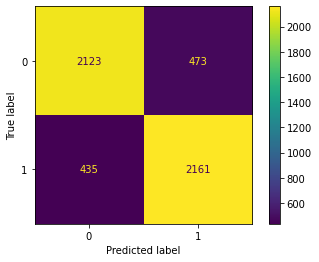

test scores:
Accuracy:  0.7970802919708029
Precision:  0.13986013986013987
Recall:  0.5555555555555556
F1 Score:  0.223463687150838
ROC AUC:  0.6830166067454202


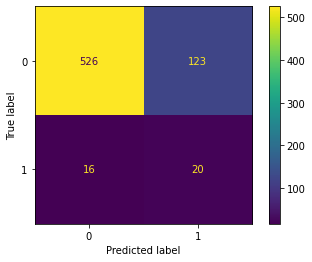

In [99]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(random_state=42).fit(X_train_bal, y_train_bal)

print('train scores:')
test_classifier(log_clf, X_train_bal, y_train_bal)
plt.show()
print('test scores:')
test_classifier(log_clf, X_test, y_test)
plt.show()

#### Feature Importance Analysis

Feature Weights:

Feature: gender , Score: -0.87790
Feature: age , Score: 1.32454
Feature: hypertension , Score: -0.59066
Feature: heart_disease , Score: -0.53216
Feature: ever_married , Score: -0.40955
Feature: Residence_type , Score: -0.34610
Feature: avg_glucose_level , Score: -0.03104
Feature: bmi , Score: -0.25182
Feature: bmi_age , Score: 0.48149
Feature: glucose_age , Score: 0.36483
Feature: work_type_Govt_job , Score: -4.25909
Feature: work_type_Never_worked , Score: -1.08375
Feature: work_type_Private , Score: -3.05537
Feature: work_type_Self-employed , Score: -4.10350
Feature: work_type_children , Score: -1.87241
Feature: smoking_status_formerly smoked , Score: -3.56335
Feature: smoking_status_never smoked , Score: -3.80393
Feature: smoking_status_smokes , Score: -3.57438


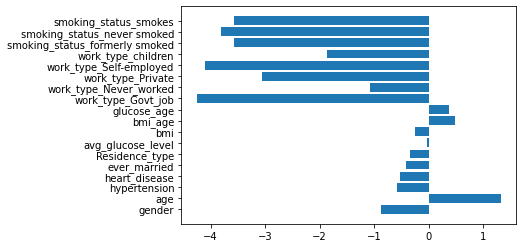

In [102]:
# get importance
importance = log_clf.coef_[0]
# summarize feature importance
print('Feature Weights:\n')
for i,v in enumerate(importance):
    print('Feature:',column_labels[i],', Score: %.5f' % (v))
# plot feature importance
plt.barh(column_labels, importance)
plt.show()

In [104]:
#p-values for logistic regression

from scipy.stats import norm

def logit_pvalue(model, x):
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return p

print('Feature P-Values:\n')

p_vals = logit_pvalue(log_clf, X_train_bal)
for i,l in enumerate(column_labels):
    print('Feature: ',l,', P-Value: ', p_vals[i])


Feature P-Values:

Feature:  gender , P-Value:  0.0
Feature:  age , P-Value:  0.0
Feature:  hypertension , P-Value:  2.9286724678723175e-06
Feature:  heart_disease , P-Value:  3.204286245228616e-07
Feature:  ever_married , P-Value:  0.0004943968015329592
Feature:  Residence_type , P-Value:  0.001138306613781781
Feature:  avg_glucose_level , P-Value:  1.772762253415827e-05
Feature:  bmi , P-Value:  0.8817537895251677
Feature:  bmi_age , P-Value:  0.22904513520188452
Feature:  glucose_age , P-Value:  0.1317661425985961
Feature:  work_type_Govt_job , P-Value:  0.14690575930532512
Feature:  work_type_Never_worked , P-Value:  0.0
Feature:  work_type_Private , P-Value:  0.3142937120769993
Feature:  work_type_Self-employed , P-Value:  0.0
Feature:  work_type_children , P-Value:  0.0
Feature:  smoking_status_formerly smoked , P-Value:  0.024043727094577916
Feature:  smoking_status_never smoked , P-Value:  0.0
Feature:  smoking_status_smokes , P-Value:  0.0


## 5. PCA

#### Analysis of Principle Components of Features

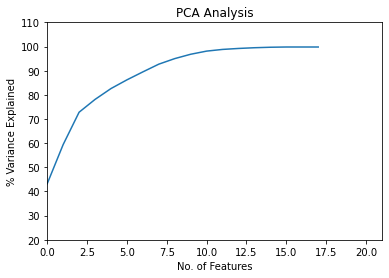

In [89]:
from sklearn.decomposition import PCA

#Apply PCA to see how many features we need to select

covar_matrix = PCA(n_components = 18) 
covar_matrix.fit(X)

#Calculate variance ratios
variance = covar_matrix.explained_variance_ratio_ 
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

#Plot graph 

plt.ylabel('% Variance Explained')
plt.xlabel('No. of Features')
plt.title('PCA Analysis')
plt.ylim(20,110)
plt.xlim(0,21)
plt.plot(var)

#### PCA Calculation

In [90]:
#create principle components that capture about 90% of variance
num_pca = 7
pca = PCA(n_components=num_pca)
principleComponents = pca.fit_transform(X)

pca_columns = []
for n in range(1,num_pca+1):
    pca_columns.append(("principle_component_" + str(n)))
    
print(pca_columns)

X_pca = pd.DataFrame(data = principleComponents, columns = pca_columns)

X_pca.head()

['principle_component_1', 'principle_component_2', 'principle_component_3', 'principle_component_4', 'principle_component_5', 'principle_component_6', 'principle_component_7']


,principle_component_1,principle_component_2,principle_component_3,principle_component_4,principle_component_5,principle_component_6,principle_component_7
0,3.827673,-1.120379,1.119598,0.820705,-0.384639,-0.216423,0.566778
1,2.139789,0.686218,-0.894086,-0.533587,-0.828092,0.595814,0.579632
2,1.182791,-0.483626,1.009861,0.647437,-0.326848,-0.761579,-0.452220
3,2.661374,-1.711523,-0.848401,-0.874546,0.411408,0.343874,-0.482985
4,3.450606,-1.250975,-0.338076,0.758016,-0.536565,-0.216029,0.542543


In [91]:
#create train and test data for PCA data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2,stratify=y,random_state=42)

#balance train pca dataset
oversampler = SMOTE(random_state=42)
X_train_bal_pca, y_train_bal_pca = oversampler.fit_resample(X_train_pca, y_train_pca)


#### Testing Logistic Regression with PCA

train scores:
Accuracy:  0.7744607087827426
Precision:  0.7525700106345268
Recall:  0.8177966101694916
F1 Score:  0.7838286874653867
ROC AUC:  0.7744607087827426


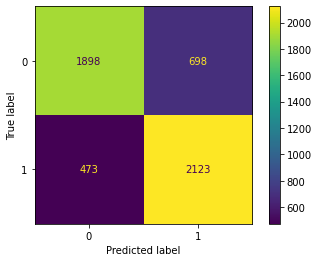

test scores:
Accuracy:  0.7313868613138687
Precision:  0.12626262626262627
Recall:  0.6944444444444444
F1 Score:  0.2136752136752137
ROC AUC:  0.7139402499571991


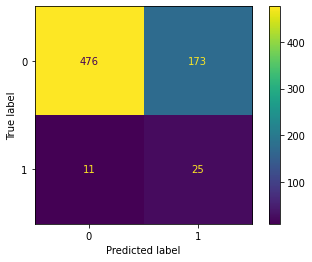

In [92]:
#test logistic regression with pca
from sklearn.linear_model import LogisticRegression
log_clf_pca = LogisticRegression(random_state=42).fit(X_train_bal_pca, y_train_bal_pca)

print('train scores:')
test_classifier(log_clf_pca, X_train_bal_pca, y_train_bal_pca)
plt.show()
print('test scores:')
test_classifier(log_clf_pca, X_test_pca, y_test_pca)
plt.show()

## 6. Cross-Validation

In order to optimize values for my classifiers, and tune hyperparameters, I have chosen to use sklearn's gridsearchCV to perform cross-validation and optimization, using ROC AUC as my metric of choice. 

## 7. Random Forest (Ensemble Method)

In [30]:
#hyperparameter grid
n_estimators = [100, 300, 500]
max_depth = [5, 8, 15, 25]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 5, 10] 

rf_params = dict(n_estimators = n_estimators, max_depth = max_depth,  min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [36]:
#cross validate and train optimal random forest
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv = 5, verbose = 1, scoring=metrics.roc_auc_score, n_jobs=-1)
rf_clf = rf_grid.fit(X_train_bal, y_train_bal)


Fitting 5 folds for each of 192 candidates, totalling 960 fits


In [ ]:
#do the same for pca data
rf_grid_pca = GridSearchCV(RandomForestClassifier(), rf_params, cv = 5, verbose = 1, scoring=metrics.roc_auc_score, n_jobs=-1)
rf_clf_pca = rf_grid_pca.fit(X_train_bal_pca, y_train_bal_pca)

Best Params for RF:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
train scores:
Accuracy:  0.8295454545454546
Precision:  0.7843137254901961
Recall:  0.9090909090909091
F1 Score:  0.8421052631578948
ROC AUC:  0.8295454545454546


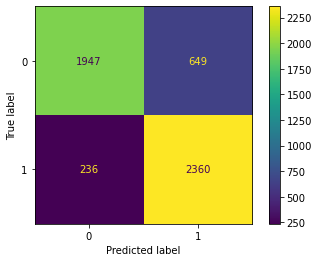

test scores:
Accuracy:  0.7401459854014598
Precision:  0.13020833333333334
Recall:  0.6944444444444444
F1 Score:  0.2192982456140351
ROC AUC:  0.7185627461051189


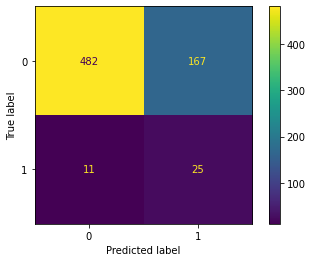

In [63]:
print('Best Params for RF:')
print(rf_clf.best_params_)
print('train scores:')
test_classifier(rf_clf, X_train_bal, y_train_bal)
plt.show()
print('test scores:')
test_classifier(rf_clf, X_test, y_test)
plt.show()

Best Params for RF (PCA):
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
train scores:
Accuracy:  0.8370570107858244
Precision:  0.8021408839779005
Recall:  0.8948382126348228
F1 Score:  0.8459577567370721
ROC AUC:  0.8370570107858243


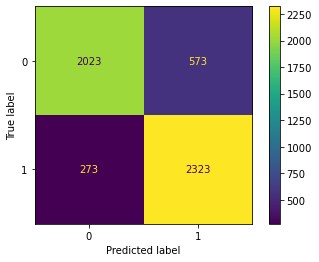

test scores:
Accuracy:  0.7722627737226277
Precision:  0.12962962962962962
Recall:  0.5833333333333334
F1 Score:  0.2121212121212121
ROC AUC:  0.6830380071905496


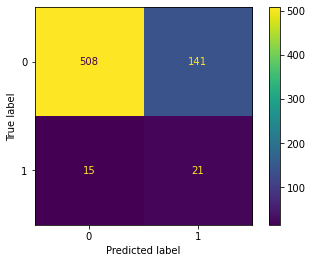

In [64]:
print('Best Params for RF (PCA):')
print(rf_clf_pca.best_params_)
print('train scores:')
test_classifier(rf_clf_pca, X_train_bal_pca, y_train_bal_pca)
plt.show()
print('test scores:')
test_classifier(rf_clf_pca, X_test_pca, y_test_pca)
plt.show()

## 8. Neural Network:

In [93]:
from sklearn.neural_network import MLPClassifier

alpha = [0.0001,0.01, 1, 10]
activation = ['relu','tanh']
hidden_layer_sizes = [(5,),(10,),(10,10),(100,),(20,20,20)]

neural_network = MLPClassifier(solver='lbfgs',random_state=42)
nn_params = dict(alpha=alpha, activation=activation, hidden_layer_sizes=hidden_layer_sizes)

In [94]:
import warnings
warnings.filterwarnings('ignore')

#cross validate and train optimal random forest
nn_grid = GridSearchCV(neural_network, nn_params, cv = 5, verbose = 1, scoring=metrics.roc_auc_score, n_jobs=-1)
nn_clf = nn_grid.fit(X_train_bal, y_train_bal)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [95]:
import warnings
warnings.filterwarnings('ignore')

#dp the same for pca data
nn_grid_pca = GridSearchCV(neural_network, nn_params, cv = 5, verbose = 1, scoring=metrics.roc_auc_score, n_jobs=-1)
nn_clf_pca = nn_grid_pca.fit(X_train_bal_pca, y_train_bal_pca)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


Best Params for NN:
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (5,)}
train scores:
Accuracy:  0.8776964560862865
Precision:  0.8614080353851824
Recall:  0.900231124807396
F1 Score:  0.8803917875306082
ROC AUC:  0.8776964560862867


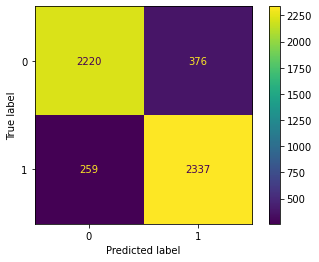

test scores:
Accuracy:  0.8189781021897811
Precision:  0.1206896551724138
Recall:  0.3888888888888889
F1 Score:  0.1842105263157895
ROC AUC:  0.6158620099298066


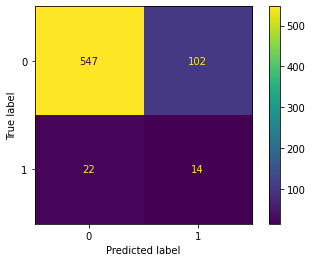

In [96]:
print('Best Params for NN:')
print(nn_clf.best_params_)
print('train scores:')
test_classifier(nn_clf, X_train_bal, y_train_bal)
plt.show()
print('test scores:')
test_classifier(nn_clf, X_test, y_test)
plt.show()

Best Params for NN (PCA):
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (5,)}
train scores:
Accuracy:  0.812788906009245
Precision:  0.7839160839160839
Recall:  0.8636363636363636
F1 Score:  0.8218475073313782
ROC AUC:  0.812788906009245


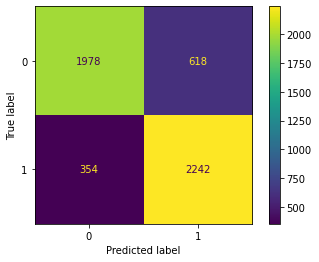

test scores:
Accuracy:  0.7386861313868613
Precision:  0.11351351351351352
Recall:  0.5833333333333334
F1 Score:  0.19004524886877827
ROC AUC:  0.6653184386235235


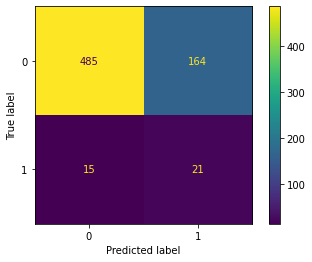

In [97]:
print('Best Params for NN (PCA):')
print(nn_clf_pca.best_params_)
print('train scores:')
test_classifier(nn_clf_pca, X_train_bal_pca, y_train_bal_pca)
plt.show()
print('test scores:')
test_classifier(nn_clf_pca, X_test_pca, y_test_pca)
plt.show()

## 9. Custom Model

My results with random forest have prompted me to look into xgboost, an ensemble method based on decision trees that has appears popular right now.

In [47]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score
import xgboost as xgb

#set up input space of xgboost hyperparameters
space={ 'max_depth' : hp.quniform('max_depth', 3, 10, 1),
        'learning_rate' : hp.quniform('learning_rate', 0.05, 0.5, 0.05),
        'n_estimators' : hp.quniform('n_estimators', 20, 200, 10),
        'gamma' : hp.quniform('gamma', 0, 0.50, 0.1),
        'min_child_weight' : hp.quniform('min_child_weight', 1, 20, 1),
        'subsample' : hp.quniform('subsample', 0.1, 1, 0.1),
        'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.1)       
        }

#set up objective function
def hp_tuning(space):
  XGB_clf = xgb.XGBClassifier(max_depth = int(space['max_depth']),
                                    learning_rate = space['max_depth'],
                                    n_estimators = int(space['n_estimators']), 
                                    gamma = space['gamma'],
                                    min_child_weight=space['min_child_weight'],
                                    subsample=space['subsample'],
                                    colsample_bytree=space['colsample_bytree'],
                                    eval_metric='auc'
                                    )
  
  cv_score = -np.mean(cross_val_score(XGB_clf, X_train_bal, y_train_bal, cv=5, scoring='roc_auc'))
  return {'loss':cv_score, 'status': STATUS_OK}

trials=Trials()

#perform tuning
best = fmin(fn=hp_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=100, 
            trials=trials)
print(best)

100%|██████████| 100/100 [01:01<00:00,  1.62trial/s, best loss: -0.8136232673738103]
{'colsample_bytree': 0.6000000000000001, 'gamma': 0.4, 'learning_rate': 0.5, 'max_depth': 9.0, 'min_child_weight': 18.0, 'n_estimators': 120.0, 'subsample': 0.2}


Accuracy:  0.7679121725731896
Precision:  0.7353637901861252
Recall:  0.8370570107858244
F1 Score:  0.7829219960367502
ROC AUC:  0.7679121725731896
Accuracy:  0.7036496350364964
Precision:  0.1187214611872146
Recall:  0.7222222222222222
F1 Score:  0.20392156862745098
ROC AUC:  0.7124208183530218


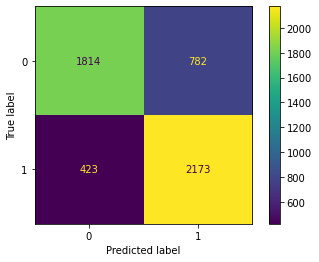

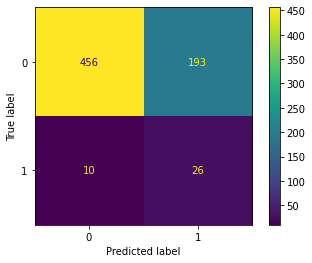

In [48]:
best_xgb = xgb.XGBClassifier(max_depth = int(best['max_depth']),
                                    learning_rate = best['max_depth'],
                                    n_estimators = int(best['n_estimators']), 
                                    gamma = best['gamma'],
                                    min_child_weight=best['min_child_weight'],
                                    subsample=best['subsample'],
                                    colsample_bytree=best['colsample_bytree'],
                                    eval_metric='auc'
                                    )

best_xgb.fit(X_train_bal, y_train_bal)

Train Scores XGB:
Accuracy:  0.7679121725731896
Precision:  0.7353637901861252
Recall:  0.8370570107858244
F1 Score:  0.7829219960367502
ROC AUC:  0.7679121725731896


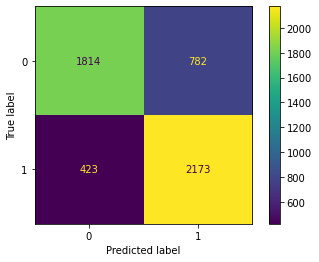

In [49]:
print('Train Scores XGB:')
test_classifier(best_xgb, X_train_bal, y_train_bal)

Test Scores XGB:
Accuracy:  0.7036496350364964
Precision:  0.1187214611872146
Recall:  0.7222222222222222
F1 Score:  0.20392156862745098
ROC AUC:  0.7124208183530218


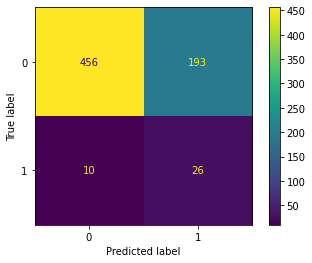

In [50]:
print('Test Scores XGB:')
test_classifier(best_xgb, X_test, y_test)

In [64]:
#set up objective function
def hp_tuning_pca(space):
  XGB_clf_pca = xgb.XGBClassifier(max_depth = int(space['max_depth']),
                                    learning_rate = space['max_depth'],
                                    n_estimators = int(space['n_estimators']), 
                                    gamma = space['gamma'],
                                    min_child_weight=space['min_child_weight'],
                                    subsample=space['subsample'],
                                    colsample_bytree=space['colsample_bytree'],
                                    eval_metric='auc'
                                    )
  
  cv_score = -np.mean(cross_val_score(XGB_clf_pca, X_train_bal_pca, y_train_bal_pca, cv=5, scoring='roc_auc'))
  return {'loss':cv_score, 'status': STATUS_OK}

trials=Trials()

#perform tuning
best_pca = fmin(fn=hp_tuning_pca,
            space=space,
            algo=tpe.suggest,
            max_evals=100, 
            trials=trials)
print(best_pca)

100%|██████████| 100/100 [02:30<00:00,  1.51s/trial, best loss: -0.8114191049872161]
{'colsample_bytree': 0.7000000000000001, 'gamma': 0.0, 'learning_rate': 0.25, 'max_depth': 7.0, 'min_child_weight': 17.0, 'n_estimators': 110.0, 'subsample': 0.2}


In [65]:
best_xgb_pca = xgb.XGBClassifier(max_depth = int(best_pca['max_depth']),
                                    learning_rate = best_pca['max_depth'],
                                    n_estimators = int(best_pca['n_estimators']), 
                                    gamma = best_pca['gamma'],
                                    min_child_weight=best_pca['min_child_weight'],
                                    subsample=best_pca['subsample'],
                                    colsample_bytree=best_pca['colsample_bytree'],
                                    eval_metric='auc'
                                    )

best_xgb_pca.fit(X_train_bal_pca, y_train_bal_pca)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7000000000000001,
              eval_metric='auc', gamma=0.0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=7.0, max_delta_step=0,
              max_depth=7, min_child_weight=17.0, missing=nan,
              monotone_constraints='()', n_estimators=110, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.2, tree_method='exact',
              validate_parameters=1, verbosity=None)

Train Scores XGB:
Accuracy:  0.5
Precision:  0.5
Recall:  1.0
F1 Score:  0.6666666666666666
ROC AUC:  0.5


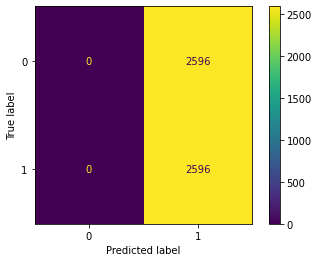

In [66]:
print('Train Scores XGB:')
test_classifier(best_xgb_pca, X_train_bal_pca, y_train_bal_pca)

Test Scores XGB:
Accuracy:  0.052554744525547446
Precision:  0.052554744525547446
Recall:  1.0
F1 Score:  0.09986130374479889
ROC AUC:  0.5


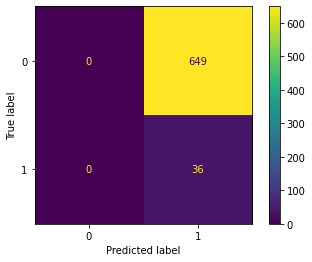

In [67]:
print('Test Scores XGB:')
test_classifier(best_xgb_pca, X_test_pca, y_test_pca)